Author : Akash Pandey
DOMAIN : Data Science

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Auto Regression model (AR)

In [2]:
#Auto Regression example-suitable for data without and seasonal component like (month,day,hour)
from statsmodels.tsa.ar_model import AutoReg

In [3]:
#Create a linear data
data=[10,12,14,16,18,20,20,22]

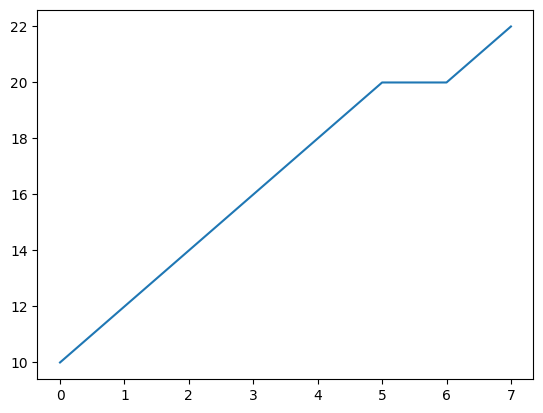

In [4]:
import matplotlib.pyplot as plt
plt.plot(data)

In [5]:
ARmodel=AutoReg(data,lags=1) #calling auto regression
ARmodel_fit=ARmodel.fit() # fitting model

In [6]:
#making prediction
ypredicted=ARmodel_fit.predict(8,10)# till 7 we have 8 ,9,10 will be predicted values
print(ypredicted)

[23.125      24.14453125 25.06848145]


In [7]:
pred_list=ypredicted.tolist()
combinedlist=data+pred_list

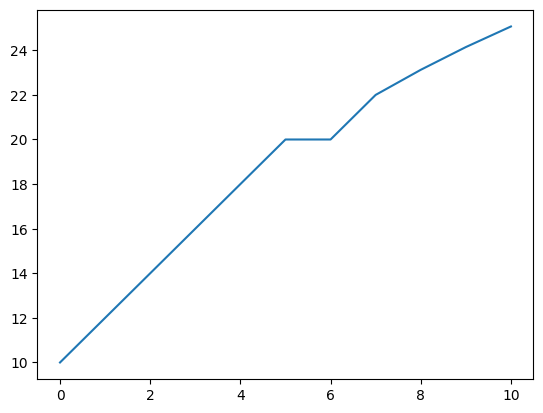

In [8]:
plt.plot(combinedlist)

# Moving Average model (MA)

In [9]:
from statsmodels.tsa.arima.model import ARIMA # suitable for data without trend and seasonality

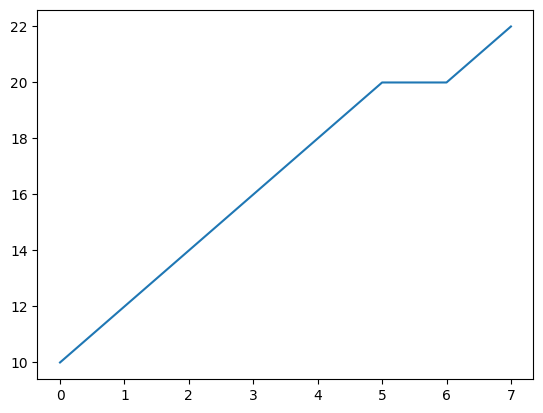

In [10]:
plt.plot(data)

In [11]:
# Create and fit the MA(2) model
MAmodel = ARIMA(data, order=(0, 0, 1))  # Model with AR=0, I=0, and MA=1
MAmodel_fit = MAmodel.fit()

In [12]:
#make prediction
ypredicted=MAmodel_fit.predict(8,10)# till 7 we have 8 ,9,10 will be predicted value
print(ypredicted)

[20.35252229 16.49895187 16.49895187]


[10, 12, 14, 16, 18, 20, 20, 22, 20.352522294483606, 16.498951872772903, 16.498951872772903]


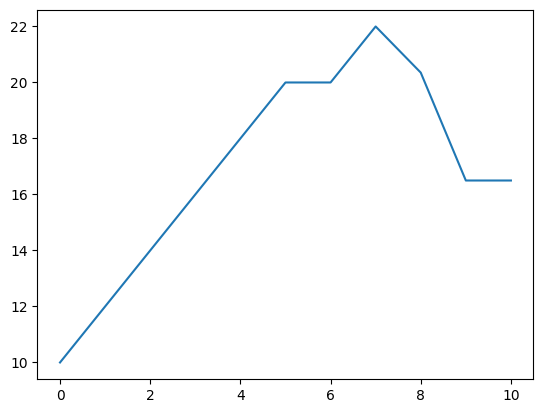

In [13]:
pred_list=ypredicted.tolist()
combinedlist=data+pred_list
print(combinedlist)
plt.plot(combinedlist)

# AutoRegression moving Average (ARMA)

In [20]:
#import Data - australian DrugSales
import pandas as pd
DrugSalesData = pd.read_csv('TimeSeries.csv', parse_dates=['Date'], index_col='Date')

In [21]:
print(DrugSalesData['Value'])


Date
1991-01-07     3.526591
1991-01-08     3.180891
1991-01-09     3.252221
1991-01-10     3.611003
1991-01-11     3.565869
                ...    
2008-01-02    21.654285
2008-01-03    18.264945
2008-01-04    23.107677
2008-01-05    22.912510
2008-01-06    19.431740
Name: Value, Length: 204, dtype: float64


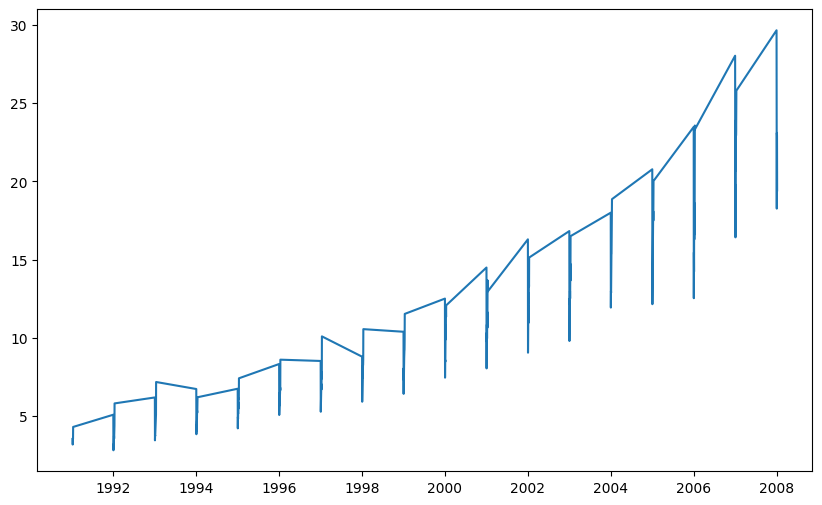

In [22]:
import matplotlib.pyplot as plt

# Update figure size
plt.rcParams.update({'figure.figsize': (10, 6)})

# Plot the data
plt.plot(DrugSalesData['Value'])


In [23]:
#fit model
ARMAmodel=ARIMA(DrugSalesData['Value'],order=(1,0,1))# Model with AR=1, I=0, and MA=1
# Fit the ARIMA model
ARMAmodel_fit = ARMAmodel.fit()

C:\Users\akash pandey\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\akash pandey\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\akash pandey\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
#make prediction
ypredicted=ARMAmodel_fit.predict(len(DrugSalesData),len(DrugSalesData)+2)
print(ypredicted)

204    21.237109
205    21.181976
206    21.127165
Name: predicted_mean, dtype: float64


C:\Users\akash pandey\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# AutoRegression Integrated Moving Average (ARIMA) model

In [33]:
# Fit model
ARIMAmodel = ARIMA(DrugSalesData['Value'], order=(1, 1, 1))  # Model with AR(p)=1, I(d)=1, and MA(q)=1 
ARIMA_model_fit = ARIMAmodel.fit()


C:\Users\akash pandey\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\akash pandey\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\akash pandey\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [37]:
ypredicted = ARIMA_model_fit.predict(len(DrugSalesData), len(DrugSalesData)+2, type='levels')
print(ypredicted)

204    21.203379
205    21.736449
206    21.896846
Name: predicted_mean, dtype: float64


C:\Users\akash pandey\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


THANKYOU